In [1]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
import os
from nltk.corpus import stopwords
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error

from transformers import AutoModel, AutoTokenizer
import json
from tensorflow.keras.models import load_model
import re
import pandas as pd
import string
import keras


In [5]:
data = pd.read_csv('spam.csv')

In [6]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
idx = [i for i in range(5572)]
data['id'] = idx

In [8]:
data

,Category,Message,id
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,ham,U dun say so early hor... U c already then say...,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",4
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,5567
5568,ham,Will ü b going to esplanade fr home?,5568
5569,ham,"Pity, * was in mood for that. So...any other s...",5569
5570,ham,The guy did some bitching but I acted like i'd...,5570


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

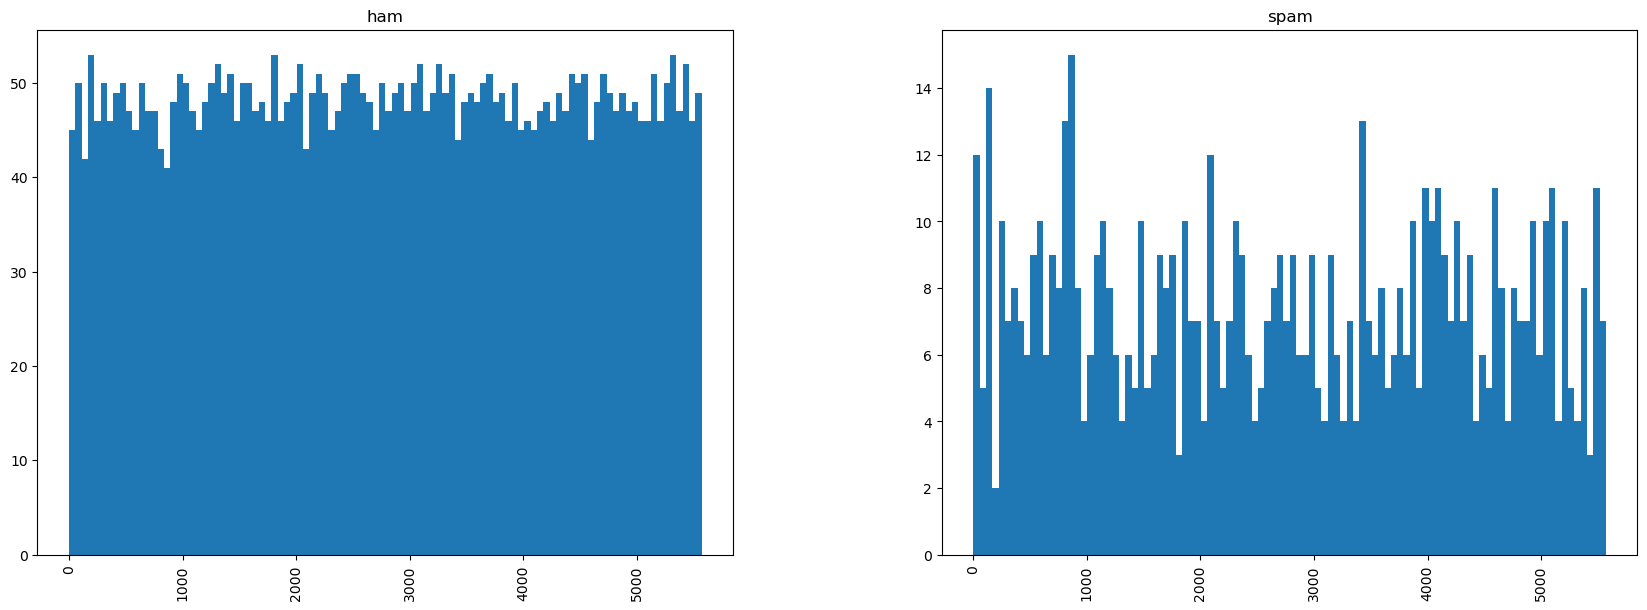

In [9]:
data.hist(column='id', by='Category', bins=100, figsize=(20,7))

In [11]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...


CalledProcessError: Command '['/usr/bin/java', '-version']' returned non-zero exit status 1.

In [15]:
import h2o

h2o.init(java_options="-Djava.library.path=/path/to/java")




H2OTypeError: Argument `kwargs` should be a dict("proxies": dict(string: string), "max_mem_size_GB": integer, "min_mem_size_GB": integer, "force_connect": bool, "as_port": bool), got dict {'java_options': '-Djava.library.path=/path/to/java'}

In [16]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.


In [3]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "21.0.1" 2023-10-17 LTS; Java(TM) SE Runtime Environment (build 21.0.1+12-LTS-29); Java HotSpot(TM) 64-Bit Server VM (build 21.0.1+12-LTS-29, mixed mode, sharing)
  Starting server from /Users/admin/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/fb/2gqv27h160qbkk6lghk1vkjw0000gn/T/tmpyd2bfv_u
  JVM stdout: /var/folders/fb/2gqv27h160qbkk6lghk1vkjw0000gn/T/tmpyd2bfv_u/h2o_admin_started_from_python.out
  JVM stderr: /var/folders/fb/2gqv27h160qbkk6lghk1vkjw0000gn/T/tmpyd2bfv_u/h2o_admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_admin_6b3228
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
from h2o.automl import H2OAutoML
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [6]:
data = h2o.import_file('spam.csv',col_names = ["category", "Email"],col_types = ["enum", "string"], header = 1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
data.head()

category,Email
Category,Message
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives around here though"
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
ham,Even my brother is not like to speak with me. They treat me like aids patent.
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


In [8]:
data['category'] = data['category'].asfactor()

In [10]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset if you haven't done so already
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def tokenize(sentences, stop_word = stop_words):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(stop_words)),:]
    return tokenized_words

In [12]:
def predict(job_title,w2v, gbm):
    words = tokenize(h2o.H2OFrame(job_title).ascharacter())
    job_title_vec = w2v.transform(words, aggregate_method="AVERAGE")
    print(gbm.predict(test_data=job_title_vec))

In [13]:
words = tokenize(data["Email"])

In [14]:
print("Build word2vec model")
w2v_model = H2OWord2vecEstimator(sent_sample_rate = 0.0, epochs = 10)
w2v_model.train(training_frame=words)

Build word2vec model
word2vec Model Build progress: |█████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OWord2vecEstimator : Word2Vec
Model Key: Word2Vec_model_python_1702967009108_1

No summary for this model

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [15]:
print("Calculate a vector for each job title")
vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

Calculate a vector for each job title


In [18]:
print("Prepare training&validation data")
categ = ~ vecs["C1"].isna()
data = data[categ,:].cbind(vecs[categ,:])



Prepare training&validation data


In [19]:
data_split = data.split_frame(ratios=[0.8])

In [20]:
aml = H2OAutoML(max_models = 10, max_runtime_secs=1000, seed = 1)

aml.train(x = vecs.names,
                y="category", 
                training_frame = data_split[0])

AutoML progress: |
11:59:00.787: AutoML: XGBoost is not available; skipping it.


11:59:01.412: GLM_1_AutoML_1_20231219_115900 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 99 out of bounds for length 99

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/4
# GBM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [21]:
leader = aml.leaderboard

leader.head()

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20231219_115900,0.363416,0.069343,0.127684,0.0163031
GBM_1_AutoML_1_20231219_115900,0.36523,0.0715519,0.127646,0.0162935
StackedEnsemble_AllModels_1_AutoML_1_20231219_115900,0.365318,0.0660679,0.126415,0.0159807
DeepLearning_1_AutoML_1_20231219_115900,0.366105,0.0901037,0.140055,0.0196153
GBM_2_AutoML_1_20231219_115900,0.366535,0.0806349,0.132314,0.0175069
GBM_4_AutoML_1_20231219_115900,0.36701,0.0836708,0.132347,0.0175157
DeepLearning_grid_1_AutoML_1_20231219_115900_model_1,0.367023,0.149884,0.14794,0.0218864
GBM_3_AutoML_1_20231219_115900,0.367099,0.0821754,0.132415,0.0175336
GBM_5_AutoML_1_20231219_115900,0.367928,0.0808798,0.13308,0.0177102
GBM_grid_1_AutoML_1_20231219_115900_model_1,0.368138,0.0808441,0.132012,0.0174272


In [22]:
leader.head(rows=leader.nrows)

model_id,mean_per_class_error,logloss,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20231219_115900,0.363416,0.069343,0.127684,0.0163031
GBM_1_AutoML_1_20231219_115900,0.36523,0.0715519,0.127646,0.0162935
StackedEnsemble_AllModels_1_AutoML_1_20231219_115900,0.365318,0.0660679,0.126415,0.0159807
DeepLearning_1_AutoML_1_20231219_115900,0.366105,0.0901037,0.140055,0.0196153
GBM_2_AutoML_1_20231219_115900,0.366535,0.0806349,0.132314,0.0175069
GBM_4_AutoML_1_20231219_115900,0.36701,0.0836708,0.132347,0.0175157
DeepLearning_grid_1_AutoML_1_20231219_115900_model_1,0.367023,0.149884,0.14794,0.0218864
GBM_3_AutoML_1_20231219_115900,0.367099,0.0821754,0.132415,0.0175336
GBM_5_AutoML_1_20231219_115900,0.367928,0.0808798,0.13308,0.0177102
GBM_grid_1_AutoML_1_20231219_115900_model_1,0.368138,0.0808441,0.132012,0.0174272


In [23]:
db_test = data_split[1]

In [24]:
predictions = aml.predict(db_test[:-1])

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/admin/anaconda3/lib/python3.11/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'C100': substituting in a column of NaN
  warnings.warn(w)


In [25]:
(predictions['predict']==db_test['category']).as_data_frame(use_pandas=True).mean()

predict    0.986726
dtype: float64

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate
from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV

In [29]:
data = pd.read_csv('spam.csv')
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

print(data.head())

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...


In [32]:
def clean_text(text):
    # Removing punctuation marks
    text = ''.join([char for char in text if char not in string.punctuation])

    # Convert text to lowercase
    text = text.lower()

    return text


data['Cleaned_Message'] = data['Message'].apply(clean_text)

# Separating features and targets
X = data['Cleaned_Message']
y = data['Category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


def preprocess_text(text):
    # Tokenize the text into individual words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the stemmed words back into a single string
    processed_text = ' '.join(stemmed_words)

    return processed_text

# Text pre-processing in the "Message" column after splitting
X_train_processed = X_train.apply(preprocess_text)
X_test_processed = X_test.apply(preprocess_text)

# Using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_processed)
X_test_vectorized = vectorizer.transform(X_test_processed)

In [31]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_vectorized, y_train)
svm_pred = svm_model.predict(X_test_vectorized)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_pred = nb_model.predict(X_test_vectorized)

# Support Vector Machine (SVM)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
svm_specificity = tn / (tn + fp)

# Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred).ravel()
nb_specificity = tn / (tn + fp)

data = [
    ["Support Vector Machine (SVM)", "{:.4f}%".format(svm_accuracy * 100), "{:.4f}%".format(
        svm_precision * 100), "{:.4f}%".format(svm_recall * 100), "{:.4f}%".format(svm_f1 * 100), "{:.4f}%".format(svm_specificity * 100)],
    ["Naive Bayes", "{:.4f}%".format(nb_accuracy * 100), "{:.4f}%".format(
        nb_precision * 100), "{:.4f}%".format(nb_recall * 100), "{:.4f}%".format(nb_f1 * 100), "{:.4f}%".format(nb_specificity * 100)],
]

# Menentukan header tabel
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity"]

# Mencetak tabel evaluasi
table = tabulate(data, headers, tablefmt="fancy_grid")
print(table)

╒══════════════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╕
│ Model                        │ Accuracy   │ Precision   │ Recall   │ F1 Score   │ Specificity   │
╞══════════════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╡
│ Support Vector Machine (SVM) │ 98.4753%   │ 99.2537%    │ 89.2617% │ 93.9929%   │ 99.8965%      │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Naive Bayes                  │ 98.3857%   │ 97.1223%    │ 90.6040% │ 93.7500%   │ 99.5859%      │
╘══════════════════════════════╧════════════╧═════════════╧══════════╧════════════╧═══════════════╛


In [34]:
def svm_objective(C, gamma, kernel):
    svm_model = SVC(C=C, gamma=gamma, kernel='linear' if kernel == 0 else 'rbf', random_state=42)
    svm_model.fit(X_train_vectorized, y_train)
    svm_pred = svm_model.predict(X_test_vectorized)
    return accuracy_score(y_test, svm_pred)

svm_search_space = {
    'C': (0.01, 10),
    'gamma': (0.001, 1),
    'kernel': (0, 1)
}

svm_optimizer = BayesianOptimization(f=svm_objective, pbounds=svm_search_space, random_state=42)
svm_optimizer.maximize(init_points=5, n_iter=15)

from sklearn.svm import SVC

# Get the best parameters from Bayesian optimization
best_params = svm_optimizer.max['params']
best_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel = 'linear' if best_params['kernel'] == 0 else 'rbf'

# Initialize and fit the SVM model with the best hyperparameters
best_svm_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel, random_state=42)
best_svm_model.fit(X_train_vectorized, y_train)
svm_pred_bayes = best_svm_model.predict(X_test_vectorized)

|   iter    |  target   |     C     |   gamma   |  kernel   |
-------------------------------------------------------------
| 1         | 0.9058    | 3.752     | 0.9508    | 0.732     |
| 2         | 0.9659    | 5.991     | 0.1569    | 0.156     |
| 3         | 0.8744    | 0.5903    | 0.8663    | 0.6011    |
| 4         | 0.983     | 7.084     | 0.02156   | 0.9699    |
| 5         | 0.9525    | 8.326     | 0.2131    | 0.1818    |
| 6         | 0.9049    | 6.88      | 1.0       | 1.0       |
| 7         | 0.983     | 7.112     | 0.02232   | 0.9983    |
| 8         | 0.9874    | 7.158     | 0.001     | 0.0       |
| 9         | 0.9695    | 10.0      | 0.001     | 1.0       |
| 10        | 0.9874    | 10.0      | 1.0       | 0.0       |
| 11        | 0.9049    | 9.657     | 0.9981    | 0.9851    |
| 12        | 0.9874    | 10.0      | 0.189     | 0.0       |
| 13        | 0.9614    | 5.263     | 0.001     | 1.0       |
| 14        | 0.9883    | 2.407     | 0.001     | 0.0       |
| 15    

In [35]:
def nb_objective(alpha):
    nb_model = MultinomialNB(alpha=alpha)
    nb_model.fit(X_train_vectorized, y_train)
    nb_pred = nb_model.predict(X_test_vectorized)
    return accuracy_score(y_test, nb_pred)

nb_search_space = {
    'alpha': (0.01, 1)
}

nb_optimizer = BayesianOptimization(f=nb_objective, pbounds=nb_search_space, random_state=42)
nb_optimizer.maximize(init_points=5, n_iter=15)

best_nb_alpha = nb_optimizer.max['params']['alpha']
best_nb_model = MultinomialNB(alpha=best_nb_alpha)
best_nb_model.fit(X_train_vectorized, y_train)
nb_pred_bayes = best_nb_model.predict(X_test_vectorized)

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.9848    | 0.3808    |
| 2         | 0.9839    | 0.9512    |
| 3         | 0.9839    | 0.7347    |
| 4         | 0.9839    | 0.6027    |
| 5         | 0.9848    | 0.1645    |
| 6         | 0.9821    | 0.01      |
| 7         | 0.9848    | 0.1644    |
| 8         | 0.9848    | 0.2858    |
| 9         | 0.9848    | 0.4748    |
| 10        | 0.9848    | 0.2242    |
| 11        | 0.9839    | 0.8427    |
| 12        | 0.9848    | 0.4304    |
| 13        | 0.9848    | 0.3321    |
| 14        | 0.9848    | 0.1906    |
| 15        | 0.9848    | 0.5137    |
| 16        | 0.9848    | 0.2556    |
| 17        | 0.9848    | 0.4057    |
| 18        | 0.9848    | 0.4966    |
| 19        | 0.9848    | 0.3551    |
| 20        | 0.9848    | 0.3082    |


In [36]:
svm_accuracy_bayes = accuracy_score(y_test, svm_pred_bayes)
svm_precision_bayes = precision_score(y_test, svm_pred_bayes)
svm_recall_bayes = recall_score(y_test, svm_pred_bayes)
svm_f1_bayes = f1_score(y_test, svm_pred_bayes)
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred_bayes).ravel()
svm_bayes_specificity = tn / (tn + fp)
# Naive Bayes
nb_accuracy_bayes = accuracy_score(y_test, nb_pred_bayes)
nb_precision_bayes = precision_score(y_test, nb_pred_bayes)
nb_recall_bayes = recall_score(y_test, nb_pred_bayes)
nb_f1_bayes = f1_score(y_test, nb_pred_bayes)
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred_bayes).ravel()
nb_bayes_specificity = tn / (tn + fp)

data = [
    ["Support Vector Machine (SVM)", "{:.4f}%".format(svm_accuracy * 100), "{:.4f}%".format(
        svm_precision * 100), "{:.4f}%".format(svm_recall * 100), "{:.4f}%".format(svm_f1 * 100), "{:.4f}%".format(svm_specificity * 100)],
    ["Naive Bayes", "{:.4f}%".format(nb_accuracy * 100), "{:.4f}%".format(
        nb_precision * 100), "{:.4f}%".format(nb_recall * 100), "{:.4f}%".format(nb_f1 * 100), "{:.4f}%".format(nb_specificity * 100)],
    ["Bayes Optimized SVM", "{:.4f}%".format(svm_accuracy_bayes * 100), "{:.4f}%".format(
        svm_precision_bayes * 100), "{:.4f}%".format(svm_recall_bayes * 100), "{:.4f}%".format(svm_f1_bayes * 100), "{:.4f}%".format(svm_bayes_specificity * 100)],
    ["Bayes Optimized Naive Bayes", "{:.4f}%".format(nb_accuracy_bayes * 100), "{:.4f}%".format(
        nb_precision_bayes * 100), "{:.4f}%".format(nb_recall_bayes * 100), "{:.4f}%".format(nb_f1 * 100), "{:.4f}%".format(nb_bayes_specificity * 100)]
]

headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity"]

table = tabulate(data, headers, tablefmt="fancy_grid")
print(table)

╒══════════════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╕
│ Model                        │ Accuracy   │ Precision   │ Recall   │ F1 Score   │ Specificity   │
╞══════════════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╡
│ Support Vector Machine (SVM) │ 98.4753%   │ 99.2537%    │ 89.2617% │ 93.9929%   │ 99.8965%      │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Naive Bayes                  │ 98.3857%   │ 97.1223%    │ 90.6040% │ 93.7500%   │ 99.5859%      │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Bayes Optimized SVM          │ 98.8341%   │ 99.2754%    │ 91.9463% │ 95.4704%   │ 99.8965%      │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Bayes Optimized Naive Bayes  │ 98.4753%   │ 97.1429%    │ 91.2752% │ 93.7500%   │ 99.5859%      │


In [38]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

nb_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1]
}

svm_grid_search = GridSearchCV(
    SVC(random_state=42), svm_param_grid, scoring='f1', cv=5)
svm_grid_search.fit(X_train_vectorized, y_train)
svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_
svm_best_model.fit(X_train_vectorized, y_train)

svm_pred_grid = svm_best_model.predict(X_test_vectorized)

# Perform grid search for Naive Bayes
nb_grid_search = GridSearchCV(MultinomialNB(), nb_param_grid, scoring='f1', cv=5)
nb_grid_search.fit(X_train_vectorized, y_train)
nb_best_params = nb_grid_search.best_params_
nb_best_model = nb_grid_search.best_estimator_
nb_best_model.fit(X_train_vectorized, y_train)

nb_pred_grid = nb_best_model.predict(X_test_vectorized)


In [39]:
svm_accuracy_grid = accuracy_score(y_test, svm_pred_grid)
svm_precision_grid = precision_score(y_test, svm_pred_grid)
svm_recall_grid = recall_score(y_test, svm_pred_grid)
svm_f1_grid = f1_score(y_test, svm_pred_grid)
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred_grid).ravel()
svm_grid_specificity = tn / (tn + fp)
# Calculate accuracy, precision, recall, and F1 score for Naive Bayes
nb_accuracy_grid = accuracy_score(y_test, nb_pred_grid)
nb_precision_grid = precision_score(y_test, nb_pred_grid)
nb_recall_grid = recall_score(y_test, nb_pred_grid)
nb_f1_grid = f1_score(y_test, nb_pred_grid)
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred_grid).ravel()
nb_grid_specificity = tn / (tn + fp)

data = [
    ["Support Vector Machine (SVM)", "{:.4f}%".format(svm_accuracy * 100), "{:.4f}%".format(
        svm_precision * 100), "{:.4f}%".format(svm_recall * 100), "{:.4f}%".format(svm_f1 * 100), "{:.4f}%".format(svm_specificity * 100)],
    ["Naive Bayes", "{:.4f}%".format(nb_accuracy * 100), "{:.4f}%".format(
        nb_precision * 100), "{:.4f}%".format(nb_recall * 100), "{:.4f}%".format(nb_f1 * 100), "{:.4f}%".format(nb_specificity * 100)],
    ["Bayes Optimized SVM", "{:.4f}%".format(svm_accuracy_bayes * 100), "{:.4f}%".format(
        svm_precision_bayes * 100), "{:.4f}%".format(svm_recall_bayes * 100), "{:.4f}%".format(svm_f1_bayes * 100), "{:.4f}%".format(svm_bayes_specificity * 100)],
    ["Bayes Optimized Naive Bayes", "{:.4f}%".format(nb_accuracy_bayes * 100), "{:.4f}%".format(
        nb_precision_bayes * 100), "{:.4f}%".format(nb_recall_bayes * 100), "{:.4f}%".format(nb_f1 * 100), "{:.4f}%".format(nb_bayes_specificity * 100)],
    ["Grid Support Vector Machine (SVM)", "{:.4f}%".format(svm_accuracy_grid * 100), "{:.4f}%".format(svm_precision_grid * 100),
     "{:.4f}%".format(svm_recall_grid * 100), "{:.4f}%".format(svm_f1_grid * 100), "{:.4f}%".format(svm_grid_specificity * 100)],
    ["Grid Naive Bayes", "{:.4f}%".format(nb_accuracy_grid * 100), "{:.4f}%".format(nb_precision_grid * 100),
     "{:.4f}%".format(nb_recall_grid * 100), "{:.4f}%".format(nb_f1_grid * 100), "{:.4f}%".format(nb_grid_specificity * 100)]
]


headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity"]

table = tabulate(data, headers, tablefmt="fancy_grid")
print(table)

╒═══════════════════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╕
│ Model                             │ Accuracy   │ Precision   │ Recall   │ F1 Score   │ Specificity   │
╞═══════════════════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╡
│ Support Vector Machine (SVM)      │ 98.4753%   │ 99.2537%    │ 89.2617% │ 93.9929%   │ 99.8965%      │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Naive Bayes                       │ 98.3857%   │ 97.1223%    │ 90.6040% │ 93.7500%   │ 99.5859%      │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Bayes Optimized SVM               │ 98.8341%   │ 99.2754%    │ 91.9463% │ 95.4704%   │ 99.8965%      │
├───────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Bayes Optimized Naive Bayes       │ 98.4753%   │ 97.1

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [42]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [43]:
mail = pd.read_csv('spam.csv')
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
mail.isnull().sum()

Category    0
Message     0
dtype: int64

In [45]:
mail.duplicated().sum()

415

In [46]:
mail.drop_duplicates( keep = 'first', inplace = True)

In [47]:
mail.size

10314

In [48]:
mail.columns = mail.columns.str.strip()
mail.columns = mail.columns.str.lower()

In [49]:
mail['category'].value_counts().to_frame()

,count
category,
ham,4516
spam,641


In [50]:
mail.loc[mail['category'] == 'spam','category'] = 1
mail.loc[mail['category'] == 'ham', 'category'] = 0

In [51]:
mail['category'] = mail['category'].astype('int64')

In [52]:
mail.describe()

,category
count,5157.000000
mean,0.124297
std,0.329952
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: xlabel='category', ylabel='count'>

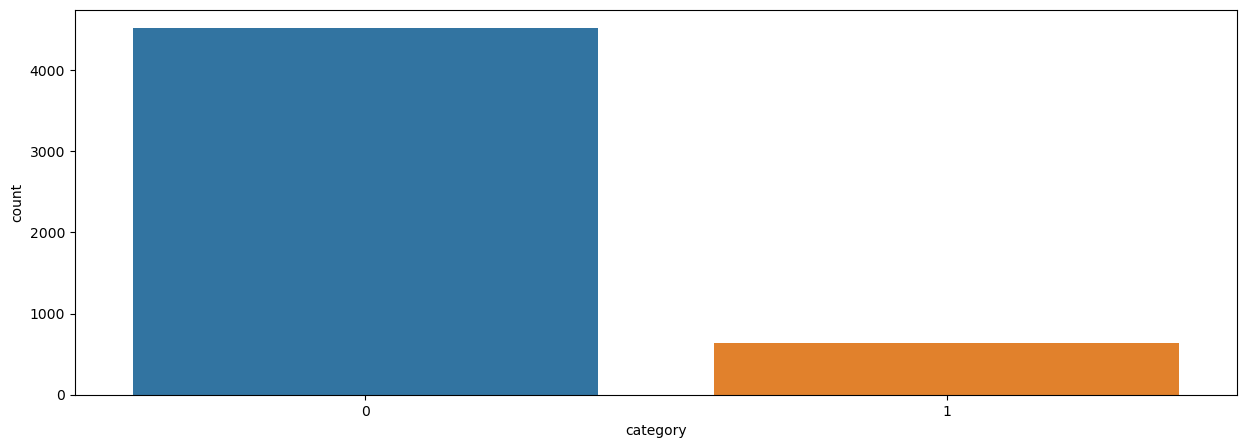

In [53]:
plt.figure(figsize= (15,5))
sns.countplot(data = mail, x= 'category')

In [54]:
X = mail['message']
y = mail['category']

In [55]:
mail.head()

,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
print(X_train.shape)
print(X_test.shape)

(4125,)
(1032,)


In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
fe = TfidfVectorizer(min_df =1, stop_words = 'english', lowercase = True)


In [60]:
X_train_fe = fe.fit_transform(X_train)
X_test_fe  = fe.transform(X_test)

In [61]:
print(X_train.head())

3734                Old Orchard near univ. How about you?
3720    Thanks for your ringtone order, reference numb...
681        What is this 'hex' place you talk of? Explain!
4165                  Its ok, called mom instead have fun
3057                             Webpage s not available!
Name: message, dtype: object


In [63]:
print(X_train_fe)

  (0, 6818)	0.5739788188946062
  (0, 4485)	0.4906764134643631
  (0, 4728)	0.4817972507769212
  (0, 4681)	0.44458562940552054
  (1, 6760)	0.2835428015076369
  (1, 6471)	0.14542627512844372
  (1, 5367)	0.24745538040851425
  (1, 1813)	0.4392463649249198
  (1, 214)	0.27022400810961306
  (1, 5742)	0.2196231824624599
  (1, 2030)	0.18952469382234666
  (1, 1020)	0.23800554610543917
  (1, 6624)	0.20630438906443613
  (1, 517)	0.18432732222631074
  (1, 1641)	0.2275449186265733
  (1, 4318)	0.15707243591111456
  (1, 7269)	0.27022400810961306
  (1, 4614)	0.16583070390719393
  (1, 5372)	0.24239181016355874
  (1, 4729)	0.20959194915388416
  (1, 5509)	0.21324550953423102
  (1, 6487)	0.16969966300214262
  (2, 2584)	0.5479285984863098
  (2, 6384)	0.40973892327544986
  (2, 4956)	0.3951202480371458
  :	:
  (4121, 1468)	0.17565732524995498
  (4121, 254)	0.19582685756101897
  (4121, 6289)	0.15915727832638799
  (4121, 5624)	0.14535496815743226
  (4121, 3898)	0.1410148881186621
  (4121, 247)	0.1402343416050663

In [64]:
modelNB = MultinomialNB()
modelNB.fit(X_train_fe, y_train)

MultinomialNB()

In [65]:
pre_model_train = modelNB.predict(X_train_fe)
pre_model_test = modelNB.predict(X_test_fe)

In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
X_test_fe.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
acc_score = accuracy_score(y_train, pre_model_train)
acc_score

0.9779393939393939

In [69]:
acc_score2 = accuracy_score(y_test, pre_model_test)
acc_score2

0.9622093023255814

In [70]:
X_train.describe()

count                                      4125
unique                                     4125
top       Old Orchard near univ. How about you?
freq                                          1
Name: message, dtype: object

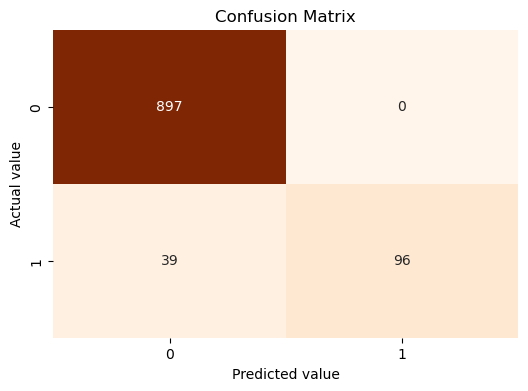

In [71]:
conf_matrix=confusion_matrix(y_test,pre_model_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [72]:
ex = ["Hurry up!!Free entry in 2 a wkly comp to win FA Cup fina...","I'm always looking for an excuse to be in the ...","URGENT! Your mobile was awarded a £1,500 Bonus...","Want explicit SEX in 30 secs? Ring 02073162414..."]
new_ex = fe.transform(ex)
pre_new_ex = modelNB.predict(new_ex)
print(pre_new_ex)

for i in range(len(ex)):
    if(pre_new_ex[i] == 1):
        print("This is a Spam mail.")
        
    else:
        print("Yeah! it's a Ham")

[1 0 1 0]
This is a Spam mail.
Yeah! it's a Ham
This is a Spam mail.
Yeah! it's a Ham


In [73]:
X_test.tail(30)

2807                                           Can a not?
1551    He says hi and to get your ass back to south t...
3261    I'm always looking for an excuse to be in the ...
1618                        Did u download the fring app?
2457                            Onum ela pa. Normal than.
3692    Sir, i am waiting for your call, once free ple...
1755    How is your schedule next week? I am out of to...
3812          Excellent! Wish we were together right now!
5114              Argh why the fuck is nobody in town ;_;
4752    Your weekly Cool-Mob tones are ready to downlo...
4306                Yo come over carlos will be here soon
4347             You still around? I could use a half-8th
3034                          Aight, lemme know what's up
548                      Sorry that took so long, omw now
2954    URGENT! Your mobile was awarded a £1,500 Bonus...
624     sorry, no, have got few things to do. may be i...
220     Yeah you should. I think you can use your gt a...
2665          